In [41]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
%matplotlib inline
%pylab inline
from matplotlib.backends.backend_pdf import PdfPages

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## Анализ средств синхронизации в Java

### Исходные данные и задача

Создается N потоков, по одному на состояние. Каждый поток переводит состояние системы в состояние, за которое отвечает этот поток, если система находится в предыдущем для потока состоянии. Иначе говоря, потоки двигают систему по кольцу состояний, при этом каждый поток отвечает за свое место на кольце. Система делает M переходов.  Начальное состояние системы - 1.

Задача состоит в том, чтобы посчитать количество переходов в единицу времени(throughput) и среднее время одного перехода(latency) для фиксированного M и разного N тремя методами(volatile, synchronized, concurrent). Сравнить полученные результаты.

M = 1000 - количество переходов, которые система должна сделать; N = [2; 64] - количество состояний; Процессор: Intel(R) Core(TM)i5-2430M CPU @2.40GHz

#### Volataile

In [42]:
threads = np.array([2, 4, 8, 16, 32, 64])
timeV = np.array([343.032, 3093.175, 17486208.335, 46042280.34, 118361805.452, 281573863.443])/1000
throughputV = 1000*1000*1000/timeV
dV = {'thread': pd.Series(threads), 'time': pd.Series(timeV)}
dfV = pd.DataFrame(dV)
dfV

,thread,time
0,2,0.343032
1,4,3.093175
2,8,17486.208335
3,16,46042.280340
4,32,118361.805452
5,64,281573.863443


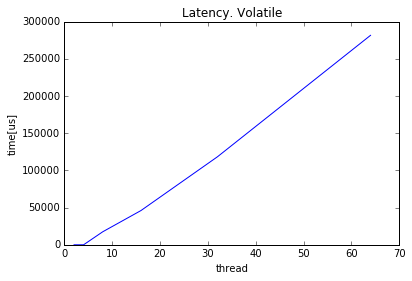

In [43]:
plt.plot(threads, timeV)
plt.ylabel("time[us]")
plt.xlabel("thread")
plt.title("Latency. Volatile")

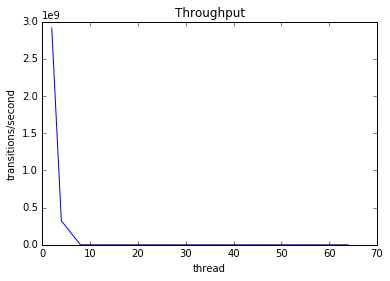

In [44]:
plt.plot(threads, throughputV)
plt.ylabel("transitions/second")
plt.xlabel("thread")
plt.title("Throughput")

#### Synchronized 

In [45]:
threads = np.array([2, 4, 8, 16, 32, 64])
timeS = np.array([4568.216, 8000.857, 19509.242, 38582.040, 73489.028, 130185.850])/1000
throughputS = 1000*1000*1000/timeS
dS = {'thread': pd.Series(threads), 'time': pd.Series(timeS)}
dfS = pd.DataFrame(dS)
dfS

,thread,time
0,2,4.568216
1,4,8.000857
2,8,19.509242
3,16,38.582040
4,32,73.489028
5,64,130.185850


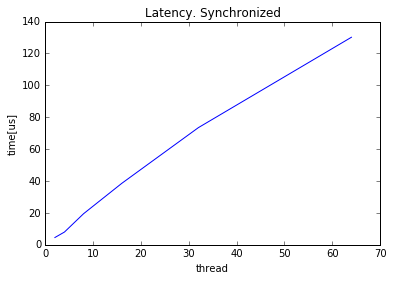

In [46]:
plt.plot( threads, timeS)
plt.ylabel("time[us]")
plt.xlabel("thread")
plt.title("Latency. Synchronized")

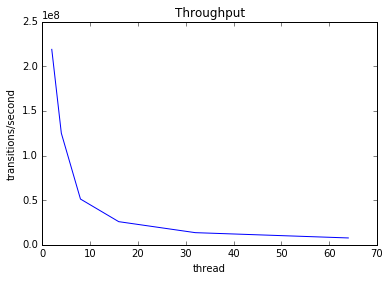

In [47]:
plt.plot(threads, throughputS)
plt.ylabel("transitions/second")
plt.xlabel("thread")
plt.title("Throughput")

#### Reentrant Lock


In [48]:
threads = np.array([2, 4, 8, 16, 32, 64])
timeL = np.array([4330.602, 11744.171, 29116.010, 49913.245, 89756.671, 137890.941])/1000
throughputL = 1000*1000*1000/timeL
dL = {'thread': pd.Series(threads), 'time': pd.Series(timeL)}
dfL = pd.DataFrame(dL)
dfL

,thread,time
0,2,4.330602
1,4,11.744171
2,8,29.116010
3,16,49.913245
4,32,89.756671
5,64,137.890941


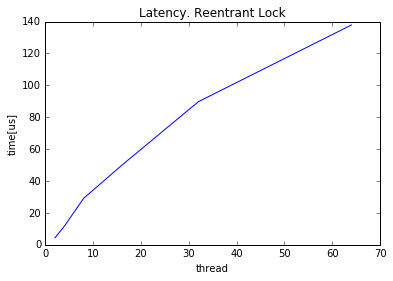

In [49]:
plt.plot( threads, timeL)
plt.ylabel("time[us]")
plt.xlabel("thread")
plt.title("Latency. Reentrant Lock")

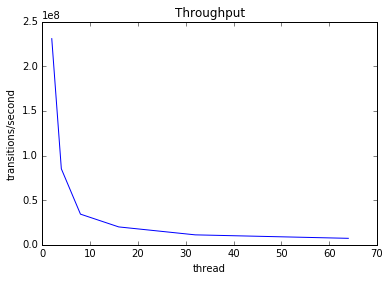

In [50]:
plt.plot(threads, throughputL)
plt.ylabel("transitions/second")
plt.xlabel("thread")
plt.title("Throughput")

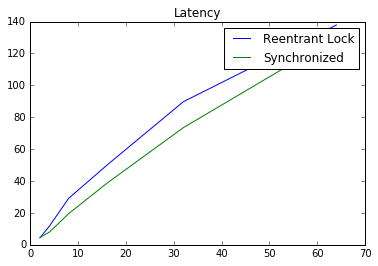

In [59]:
plt.plot( threads, timeL, label = "Reentrant Lock")
plt.plot( threads, timeS, label ="Synchronized")
plt.title("Latency")
plt.legend()


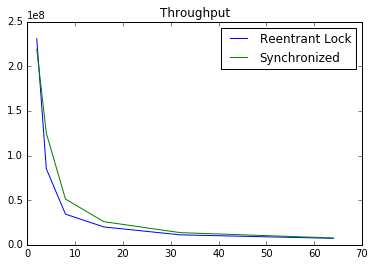

In [58]:
thL = plt.plot(threads, throughputL, label = "Reentrant Lock")
plt.plot(threads, throughputS, label ="Synchronized")
plt.title("Throughput")
plt.legend()



Из полученных графиков можно увидеть:
 1) Графики Latency:
     -при N<4 среднее время перехода выше всего у Synchronized, ниже - у Volataile
     -при N>4 среднее время перехода выше всего у Volataile, ниже - у Synchronized     
 2) Графики Throughput:
     -при N<4 пропускная способность выше всего у Volataile, ниже - у Reentrant Lock
     -при  N>4 пропускная способность ниже всего у Volataile, выше - у Synchronized
    